Packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

Données

In [7]:
# Chemins
os.chdir("D:/Home/legachet/OneDrive - Université de Rennes/école/machine learning aprofondissement/projet FI")

path_x_train = 'data/X_train_G3tdtEn.csv'
path_y_train = 'data/Y_train_2_XPXJDyy.csv'
path_x_test  = 'data/X_test_8skS2ey.csv'

# Chargement des données
df_x_train = pd.read_csv(path_x_train)
df_y_train = pd.read_csv(path_y_train)
df_x_test  = pd.read_csv(path_x_test)

# Vérification des dimensions avant fusion
print(f"Dimensions X_train : {df_x_train.shape}")
print(f"Dimensions Y_train : {df_y_train.shape}")

C:\Users\legachet\AppData\Local\Temp\ipykernel_13820\3329415586.py:9: DtypeWarning: Columns (21,22,23,24,69,70,71,72,93,94,95,96,97,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120) have mixed types. Specify dtype option on import or set low_memory=False.
  df_x_train = pd.read_csv(path_x_train)


Dimensions X_train : (92790, 146)
Dimensions Y_train : (92790, 3)


C:\Users\legachet\AppData\Local\Temp\ipykernel_13820\3329415586.py:11: DtypeWarning: Columns (20,21,22,23,24,68,69,70,71,72,92,93,94,95,96,97,106,107,108,109,110,111,112,113,114,115,116,117,118) have mixed types. Specify dtype option on import or set low_memory=False.
  df_x_test  = pd.read_csv(path_x_test)


In [9]:
# Fusion de X et Y
df_train = pd.merge(df_x_train, df_y_train, on='ID', how='inner')

print(f"Dimensions après fusion : {df_train.shape}")

display(df_train.head(10))


Dimensions après fusion : (92790, 148)


,ID,item1,item2,item3,item4,item5,item6,item7,item8,item9,...,Nbr_of_prod_purchas18,Nbr_of_prod_purchas19,Nbr_of_prod_purchas20,Nbr_of_prod_purchas21,Nbr_of_prod_purchas22,Nbr_of_prod_purchas23,Nbr_of_prod_purchas24,Nb_of_items,index,fraud_flag
0,85517,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,0
1,51113,COMPUTER PERIPHERALS ACCESSORIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,0
2,83008,TELEVISIONS HOME CINEMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2,0
3,78712,COMPUTERS,COMPUTER PERIPHERALS ACCESSORIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3,0
4,77846,TELEVISIONS HOME CINEMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4,0
5,86994,COMPUTER PERIPHERALS ACCESSORIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5,0
6,113204,TELEVISIONS HOME CINEMA,SERVICE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6,0
7,41798,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,7,0
8,83365,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,8,0
9,39361,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,9,0


Analyse du déséquilibre pour la variable de fraude


Distribution de la variable cible (fraud_flag) :
fraud_flag
0    91471
1     1319
Name: count, dtype: int64

Pourcentage de fraude : 1.42%


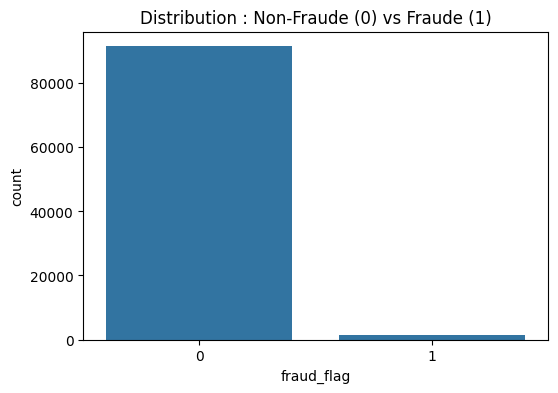

In [10]:
# Vérification du déséquilibre des classes
count_classes = df_train['fraud_flag'].value_counts()
share_classes = df_train['fraud_flag'].value_counts(normalize=True)

print("\nDistribution de la variable cible (fraud_flag) :")
print(count_classes)
print(f"\nPourcentage de fraude : {share_classes[1]:.2%}")

# Graphique pour le visualiser
plt.figure(figsize=(6, 4))
sns.countplot(x='fraud_flag', data=df_train)
plt.title('Distribution : Non-Fraude (0) vs Fraude (1)')
plt.show()

Transformation du dataset

In [11]:
def transformer_en_format_long(df):
    """
    Transforme le dataframe 'large' (1 ligne par panier)
    en dataframe 'long' (1 ligne par article).
    """
    frames = []

    # On boucle sur les 24 slots possibles
    for i in range(1, 25):
        # On sélectionne les colonnes du i-ème item + l'ID et le Flag Fraude
        cols = [
            'ID', 'fraud_flag',
            f'item{i}', f'make{i}', f'model{i}',
            f'cash_price{i}', f'Nbr_of_prod_purchas{i}'
        ]

        # On crée un sous-dataframe temporaire
        temp_df = df[cols].copy()

        # On renomme les colonnes pour qu'elles soient génériques (sans le numéro)
        temp_df.columns = ['ID', 'fraud_flag', 'category', 'make', 'model', 'price', 'quantity']

        # On ajoute ce morceau à notre liste
        frames.append(temp_df)

    # On fusionne tous les morceaux l'un sous l'autre
    df_long = pd.concat(frames, ignore_index=True)

    # On supprime les lignes vides (là où il n'y a pas d'achat)
    df_long = df_long.dropna(subset=['category'])

    return df_long

# ---------------------------------------------------------
# Application de la transformation
# ---------------------------------------------------------
print("Transformation en cours")
df_items = transformer_en_format_long(df_train)

print(f"\nDimensions du format Large (Original) : {df_train.shape}")
print(f"Dimensions du format Long (Items)     : {df_items.shape}")

display(df_items.head())

Transformation en cours

Dimensions du format Large (Original) : (92790, 148)
Dimensions du format Long (Items)     : (163357, 7)


,ID,fraud_flag,category,make,model,price,quantity
0,85517,0,COMPUTERS,APPLE,2020 APPLE MACBOOK AIR 13 3 RETINA DISPLAY M1 ...,889.0,1.0
1,51113,0,COMPUTER PERIPHERALS ACCESSORIES,APPLE,APPLE WATCH SERIES 6 GPS 44MM SPACE GREY ALUMI...,409.0,1.0
2,83008,0,TELEVISIONS HOME CINEMA,SAMSUNG,SAMSUNG QE75Q70A 2021 QLED HDR 4K ULTRA HD SMA...,1399.0,1.0
3,78712,0,COMPUTERS,APPLE,2020 APPLE IPAD AIR 10 9 A14 BIONIC PROCESSOR IOS,689.0,1.0
4,77846,0,TELEVISIONS HOME CINEMA,SONY,SONY BRAVIA KE48A9 2020 OLED HDR 4K ULTRA HD S...,1199.0,1.0
